In [85]:
import models
import helpers
import matplotlib.pyplot as plt

In [86]:
database = load_iris()

x = database.data
y = database.target

input = x
target = helpers.one_hot_encode(y)

In [109]:
learn_rate = 0.001
epochs = 200
batch_size = 1
validation_split = 0.2

neurons_configs = [[5], [3], [3, 3], [3, 2], [1, 1, 1], [1]]

In [110]:
results1 = []

for neurons in neurons_configs:
    mlp = models.MultiLayerPerceptron(input.shape[1], target.shape[1], neurons, learn_rate=learn_rate)

    history = mlp.fit(input, target, epochs, batch_size, validation_split)
    
    final_loss = history['val_loss'][-1]
    final_score = history['score'][-1]
    
    results1.append((neurons, history, final_loss, final_score))

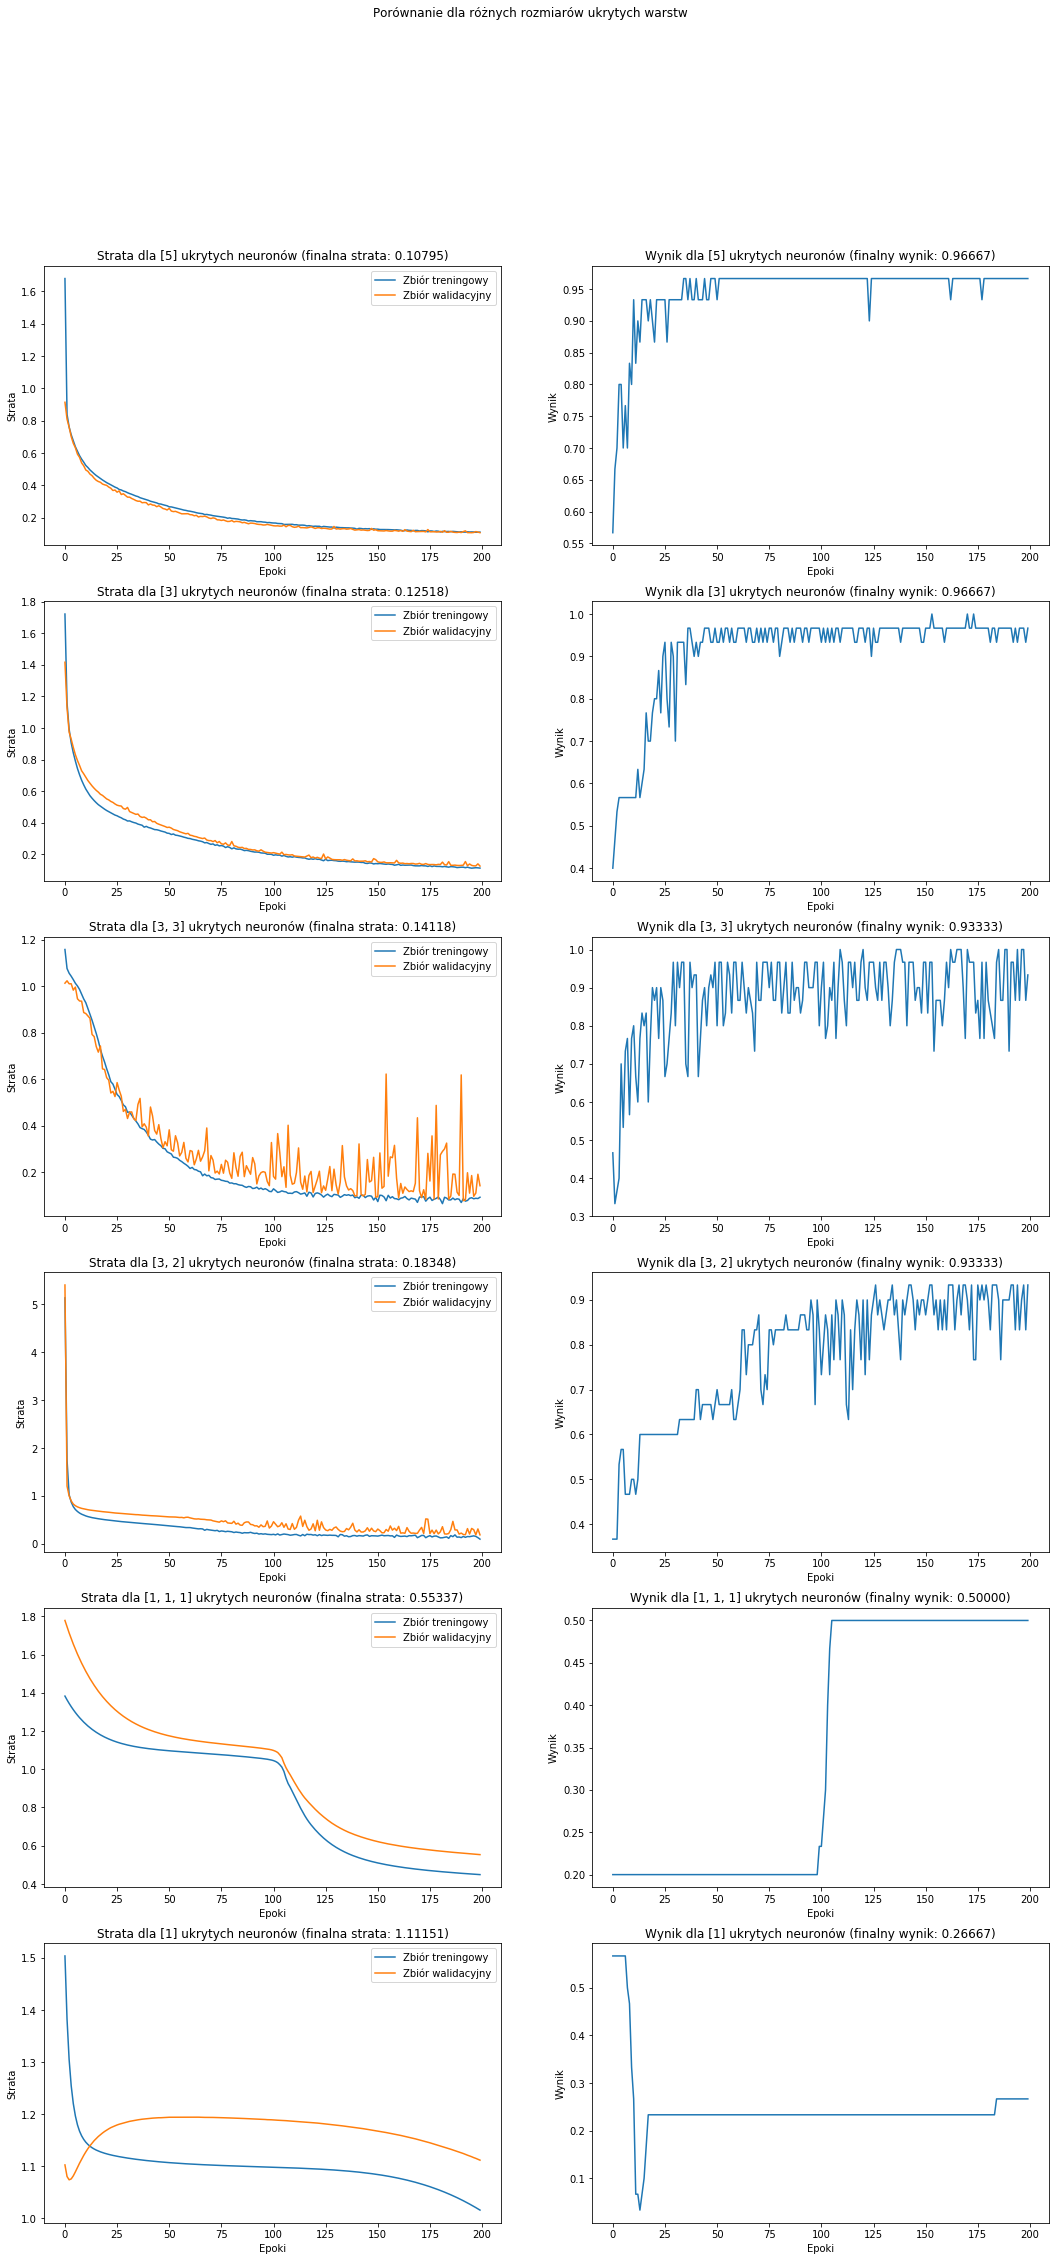

In [112]:
rows = len(results1)
cols = 2

scale_x = 9
scale_y = 6

plt.figure(figsize=(cols*scale_x, rows*scale_y))
plt.suptitle("Porównanie dla różnych rozmiarów ukrytych warstw")

for i, r in enumerate(results1):
    neurons, history, final_loss, final_score = r[0], r[1], r[2], r[3]
    
    plt.subplot(rows, cols, 2*i + 1)
    
    plt.plot(history["loss"], label='Zbiór treningowy')
    plt.plot(history["val_loss"], label='Zbiór walidacyjny')
    plt.title('Strata dla {} ukrytych neuronów (finalna strata: {:.5f})'.format(neurons, final_loss))
    plt.xlabel('Epoki')
    plt.ylabel('Strata')

    plt.legend()
    
    plt.subplot(rows, cols, 2*i + 2)
    
    plt.plot(history["score"])
    plt.title('Wynik dla {} ukrytych neuronów (finalny wynik: {:.5f})'.format(neurons, final_score))
    plt.xlabel('Epoki')
    plt.ylabel('Wynik')


In [114]:
epochs = 200
batch_size = 1
neurons = [5]

learn_rate_configs = [0.1, 0.01, 0.001, 0.0001]

In [115]:
results2 = []

for learn_rate in learn_rate_configs:
    mlp = models.MultiLayerPerceptron(input.shape[1], target.shape[1], neurons, learn_rate=learn_rate)

    history = mlp.fit(input, target, epochs, batch_size, validation_split)
    
    final_loss = history['val_loss'][-1]
    final_score = history['score'][-1]
    
    results2.append((learn_rate, history, final_loss, final_score))

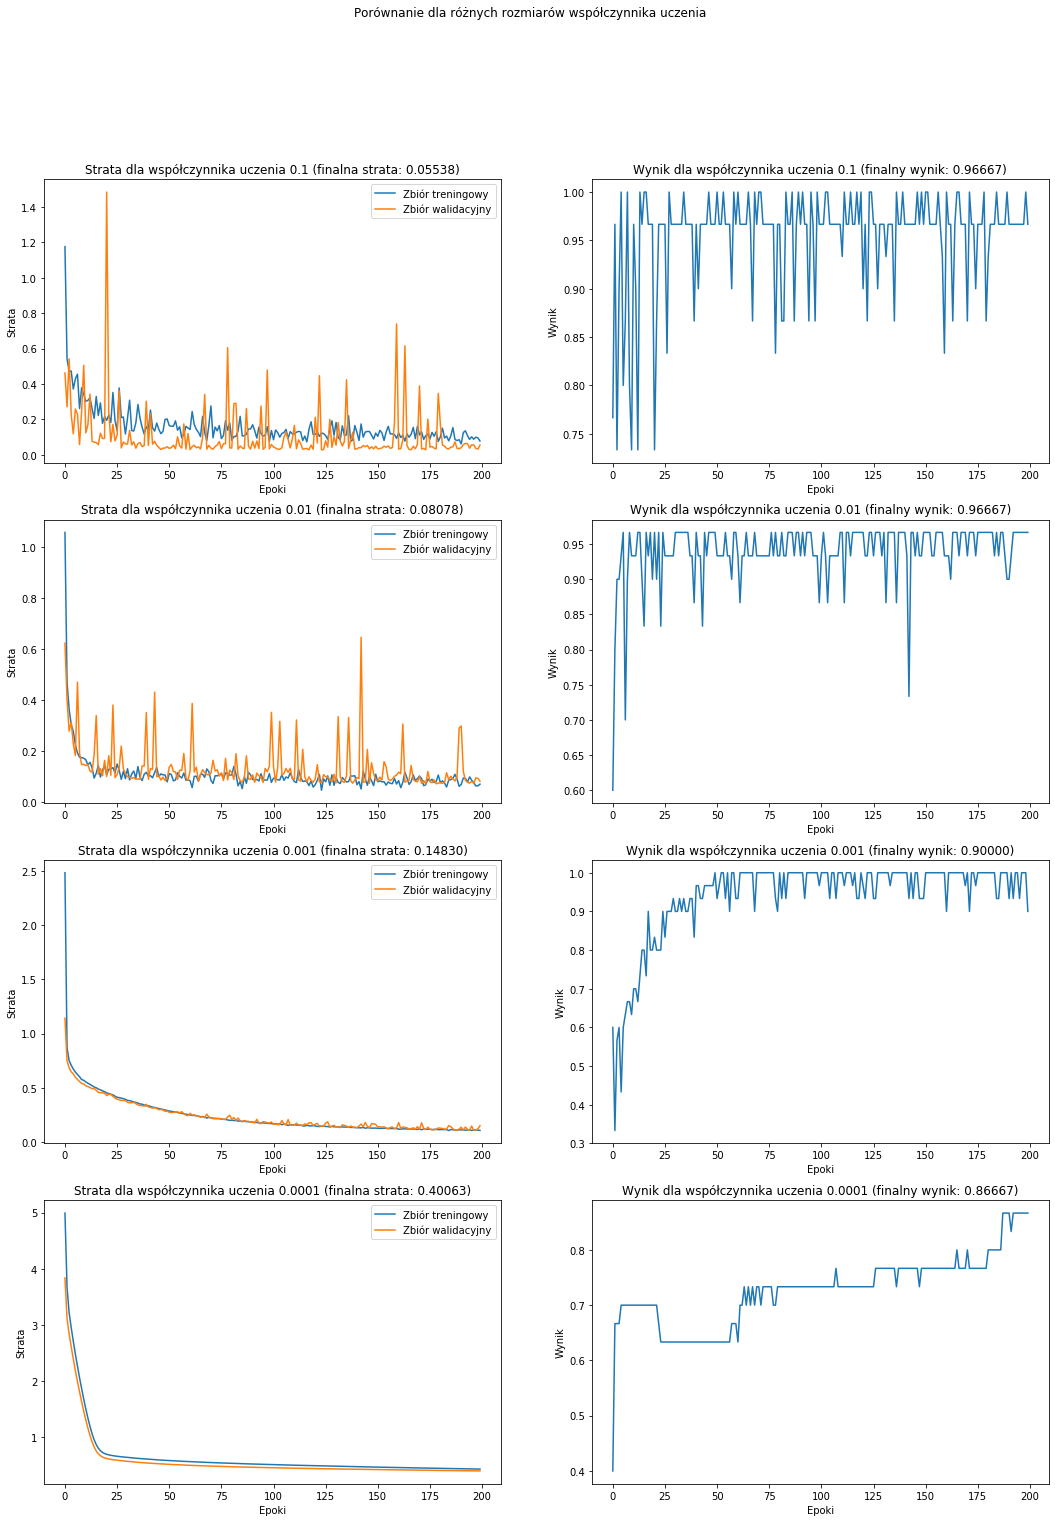

In [116]:
rows = len(results2)
cols = 2

scale_x = 9
scale_y = 6

plt.figure(figsize=(cols*scale_x, rows*scale_y))
plt.suptitle("Porównanie dla różnych rozmiarów współczynnika uczenia")

for i, r in enumerate(results2):
    learn_rate, history, final_loss, final_score = r[0], r[1], r[2], r[3]
    
    plt.subplot(rows, cols, 2*i + 1)
    
    plt.plot(history["loss"], label='Zbiór treningowy')
    plt.plot(history["val_loss"], label='Zbiór walidacyjny')
    plt.title('Strata dla współczynnika uczenia {} (finalna strata: {:.5f})'.format(learn_rate, final_loss))
    plt.xlabel('Epoki')
    plt.ylabel('Strata')

    plt.legend()
    
    plt.subplot(rows, cols, 2*i + 2)
    
    plt.plot(history["score"])
    plt.title('Wynik dla współczynnika uczenia {} (finalny wynik: {:.5f})'.format(learn_rate, final_score))
    plt.xlabel('Epoki')
    plt.ylabel('Wynik')